Rahma Zarrouk Internsavy

In [1]:
import piplite

# Install Seaborn using piplite
await piplite.install("seaborn")


In [2]:
import pandas as pd

# Use the correct relative file path to the uploaded CSV file
file_path = 'Mall_Customers.csv'  # Since it's in the 'notebooks' directory

# Load the dataset
data = pd.read_csv(file_path)




In [3]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.shape


(200, 5)

In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

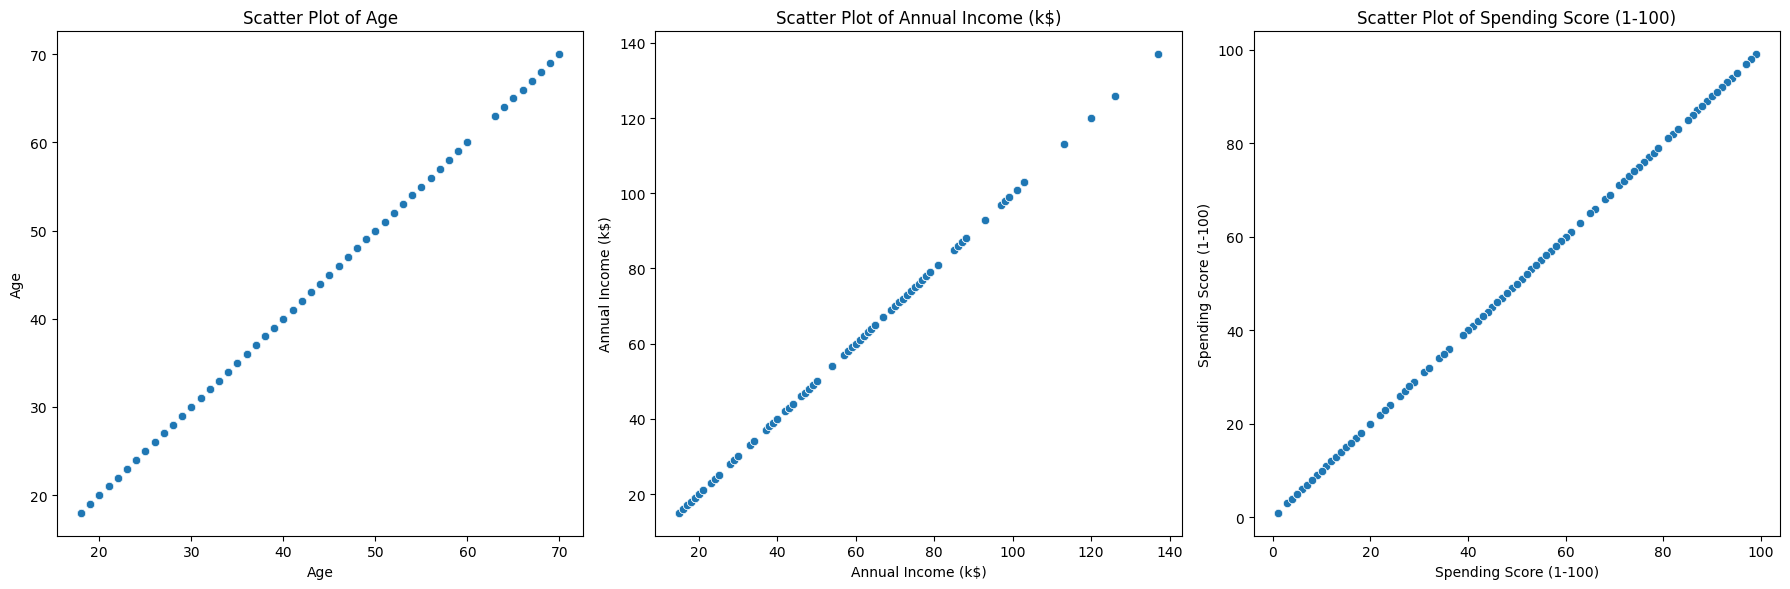

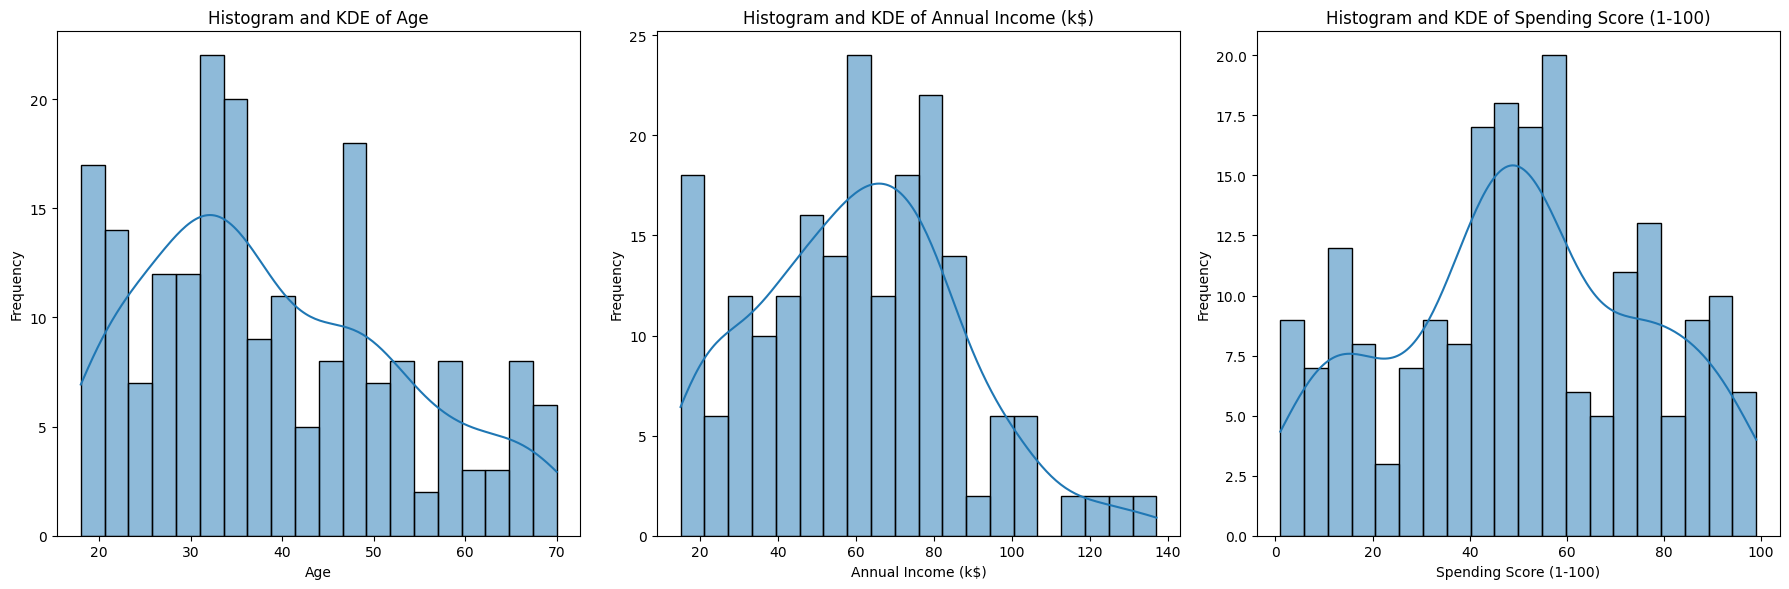

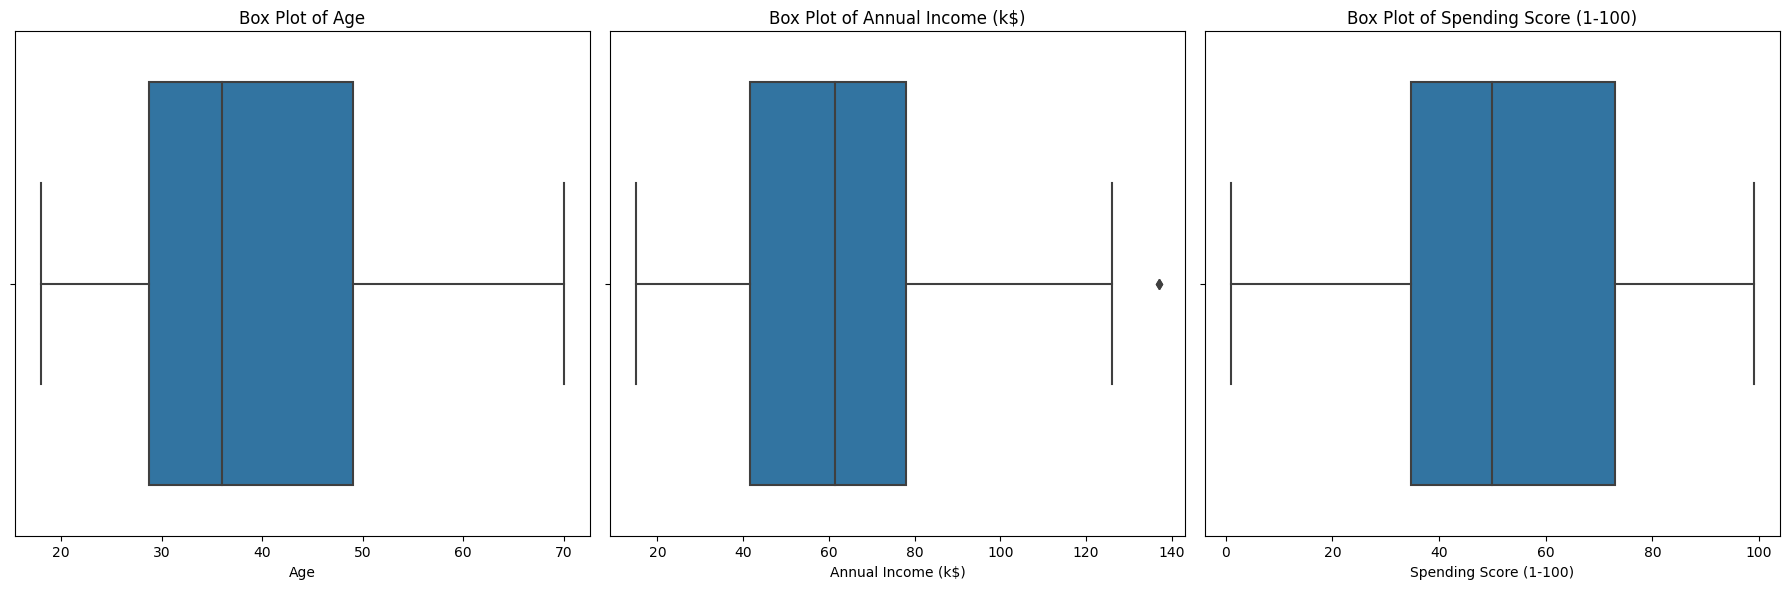

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

def diagnostic_plots(data, feature_names):
    num_features = len(feature_names)
    num_plots_per_row = 3
    num_rows = (num_features + num_plots_per_row - 1) // num_plots_per_row

    for row in range(num_rows):
        start_idx = row * num_plots_per_row
        end_idx = min(start_idx + num_plots_per_row, num_features)
        features_subset = feature_names[start_idx:end_idx]

        plt.figure(figsize=(18, 6))

        for idx, feature_name in enumerate(features_subset):
            plt.subplot(1, num_plots_per_row, idx + 1)

            # Scatter plot
            sns.scatterplot(x=data[feature_name], y=data[feature_name])
            plt.title(f'Scatter Plot of {feature_name}')
            plt.xlabel(feature_name)
            plt.ylabel(feature_name)

            plt.tight_layout()

        plt.show()

        plt.figure(figsize=(18, 6))

        for idx, feature_name in enumerate(features_subset):
            plt.subplot(1, num_plots_per_row, idx + 1)

            # Histogram
            sns.histplot(data[feature_name], bins=20, kde=True)
            plt.title(f'Histogram and KDE of {feature_name}')
            plt.xlabel(feature_name)
            plt.ylabel('Frequency')

            plt.tight_layout()

        plt.show()

        plt.figure(figsize=(18, 6))

        for idx, feature_name in enumerate(features_subset):
            plt.subplot(1, num_plots_per_row, idx + 1)

            # Box plot
            sns.boxplot(x=data[feature_name])
            plt.title(f'Box Plot of {feature_name}')
            plt.xlabel(feature_name)

            plt.tight_layout()

        plt.show()

# Replace 'data' with your actual dataset and provide a list of feature names you want to analyze
feature_names = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
diagnostic_plots(data, feature_names)


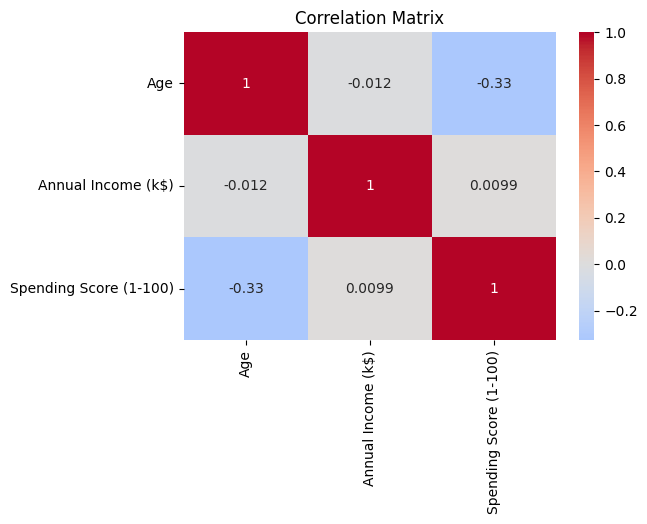

In [8]:
# Remove the 'CustomerID' column from the dataset
data_without_id = data.drop(columns=['CustomerID'])

# Calculate the correlation matrix
correlation_matrix = data_without_id.corr(numeric_only=True)

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


In [9]:
from sklearn.cluster import KMeans

# Taking annual income and spending score in x to make clusters
x = data.iloc[:, [3, 4]]

# Chosen optimal number of clusters
num_clusters = 5

# Initialize KMeans model
kmeans = KMeans(n_clusters=num_clusters, init="k-means++", max_iter=300, n_init=10, random_state=0)

# Fit the model to the data and get cluster labels
cluster_labels = kmeans.fit_predict(x)

# Add cluster labels to the original data
data['Cluster'] = cluster_labels


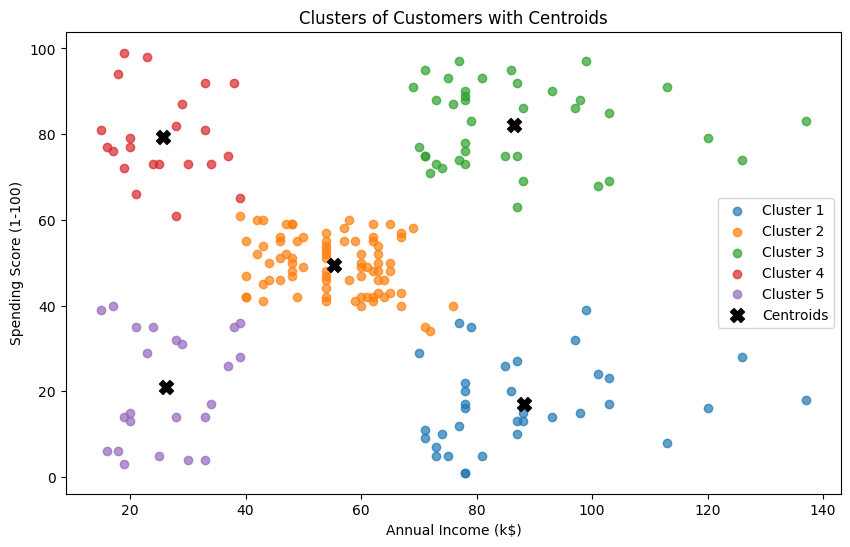

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of 'Annual Income' vs 'Spending Score', colored by cluster
plt.figure(figsize=(10, 6))
for cluster_id in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                label=f'Cluster {cluster_id + 1}', alpha=0.7)

# Plot cluster centroids with smaller markers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=100, c='black', marker='X', label='Centroids')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customers with Centroids')
plt.legend()
plt.show()


Using on the k-means clustering we have managed to form different clusters based on different features. Mall management can target the clusters with average spending score to increase their profit and should also maintain good relationship with premium customers with high spending score.They should also work on coming up with new innovative ideas to upgrade the customers with low spending score.

 Segmentation using Age, Annual Income, and Spending Score (K-Means)

In [13]:
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values


In [14]:
### Training the K-Means model on the dataset

kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` w

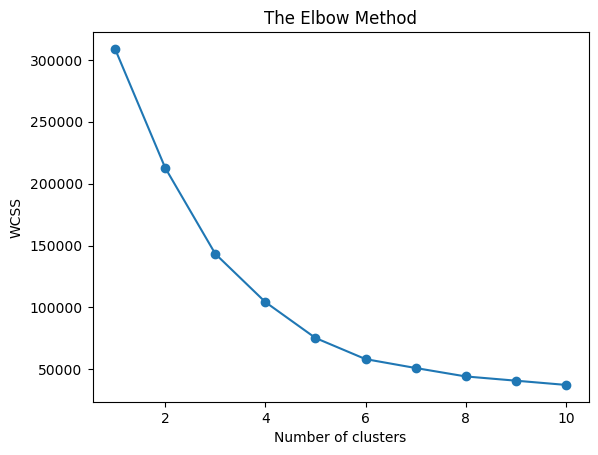

In [15]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
From the above graph, we can see that the optimal number of clusters are 6.



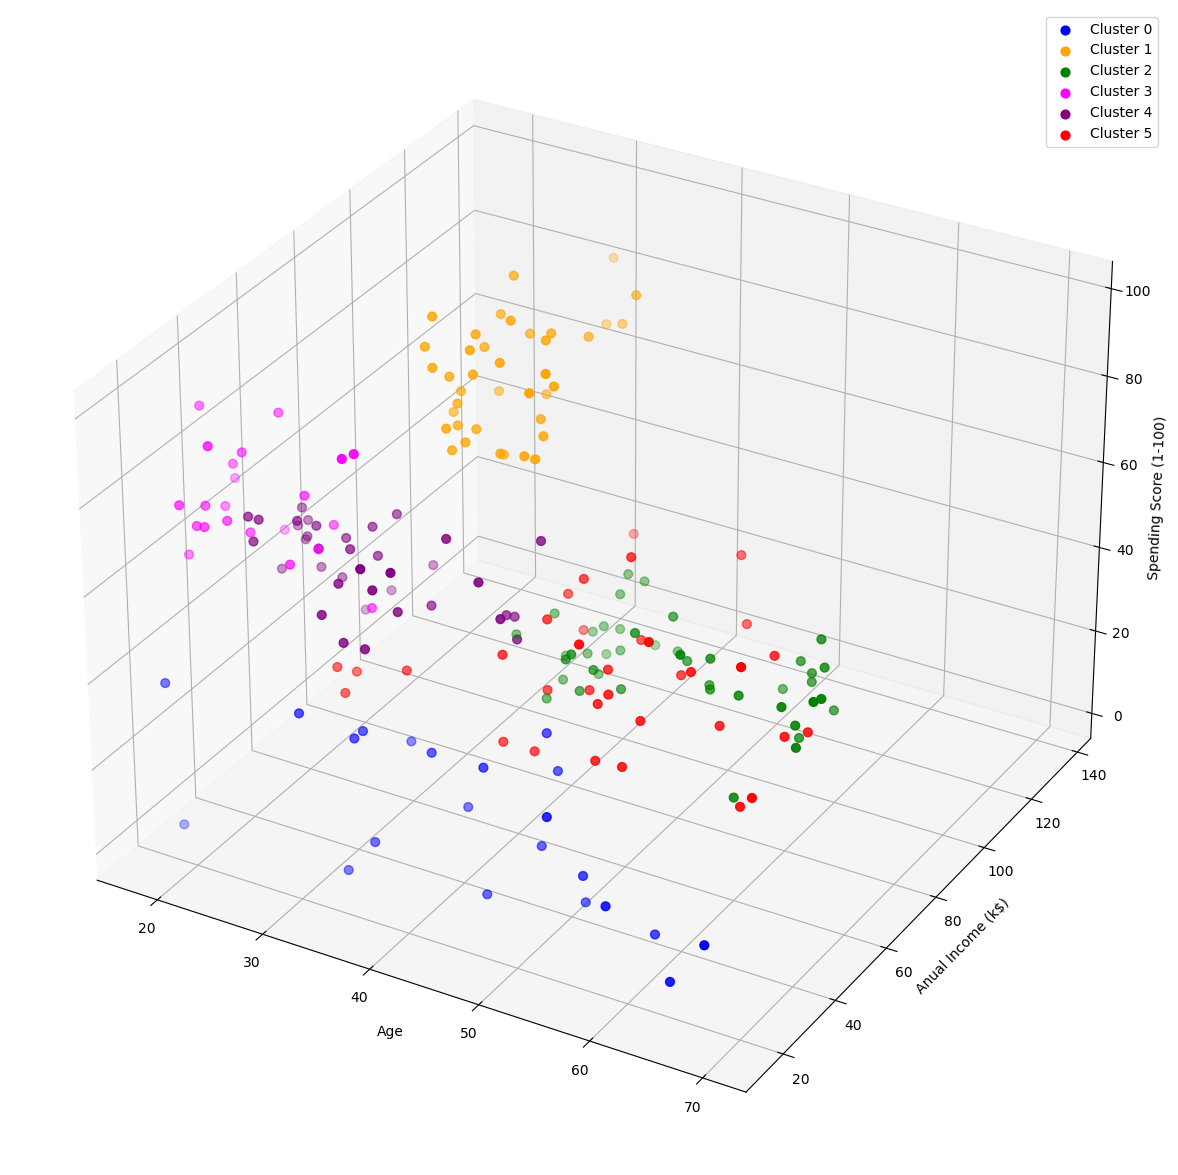

In [16]:

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s = 40 , color = 'blue', label = "Cluster 0")
ax.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s = 40 , color = 'orange', label = "Cluster 1")
ax.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], s = 40 , color = 'green', label = "Cluster 2")
ax.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], X[y_kmeans == 3, 2], s = 40 , color = 'magenta', label = "Cluster 3")
ax.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], X[y_kmeans == 4, 2], s = 40 , color = 'purple', label = "Cluster 4")
ax.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], X[y_kmeans == 5, 2], s = 40 , color = 'red', label = "Cluster 5")
ax.set_xlabel('Age')
ax.set_ylabel('Anual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
plt.show()